In [37]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [62]:
df1 = df.sort_values(by=['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.drop(['Open', 'High', 'Low', 'Volume','Name'], axis=1)
df1.tail()

,Date,Close
3014,2017-12-22,175.01
3015,2017-12-26,170.57
3016,2017-12-27,170.60
3017,2017-12-28,171.08
3018,2017-12-29,169.23


In [63]:
df1['Value']=df1['Close']
df1 = df1.drop(['Close'], axis=1)
df1.head()

,Date,Value
0,2006-01-03,10.68
1,2006-01-04,10.71
2,2006-01-05,10.63
3,2006-01-06,10.90
4,2006-01-09,10.86


In [64]:
df1['Year'] = df1['Date'].dt.year
df1['Quarter'] = df1['Date'].dt.quarter
df1['Month'] = df1['Date'].dt.month
df1['Week'] = df1['Date'].dt.week
df1['Yearday'] = df1['Date'].dt.dayofyear
df1 = df1.set_index('Date')
df1.head()

,Value,Year,Quarter,Month,Week,Yearday
Date,,,,,,
2006-01-03,10.68,2006,1,1,1,3
2006-01-04,10.71,2006,1,1,1,4
2006-01-05,10.63,2006,1,1,1,5
2006-01-06,10.90,2006,1,1,1,6
2006-01-09,10.86,2006,1,1,2,9


In [65]:
print(len(df1))
df1['Value_zscore'] = (df1['Value'] - df1['Value'].mean())/df1['Value'].std(ddof=0)
df1 = df1[abs(df1['Value_zscore']) < 3]
print(len(df1))

3019
3019


In [ ]:
dum1 = pd.get_dummies(df1['Week'])
dum2 = pd.get_dummies(df1['Weekday'])
dum3 = pd.get_dummies(df1['Year'])
df1 = pd.concat([df1, dum1, dum2, dum3], axis=1)

In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df1 = df1.drop(['Value_zscore'], axis=1)
sc2 = StandardScaler()
df1[['Yearday','Year','Week','Value','Month','Quarter']] = sc2.fit_transform(df1[['Yearday','Year','Week','Value','Month','Quarter']])
df1.head()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Value,Year,Quarter,Month,Week,Yearday
Date,,,,,,
2006-01-03,-1.212307,-1.593657,-1.359151,-1.6203,-1.716836,-1.729796
2006-01-04,-1.211633,-1.593657,-1.359151,-1.6203,-1.716836,-1.720234
2006-01-05,-1.213430,-1.593657,-1.359151,-1.6203,-1.716836,-1.710672
2006-01-06,-1.207366,-1.593657,-1.359151,-1.6203,-1.716836,-1.701110
2006-01-09,-1.208264,-1.593657,-1.359151,-1.6203,-1.649919,-1.672424


In [67]:
n = 1
for x in range(n):
    df1['Value-'+str(x+1)] = df1.Value.shift((x+1))

df1['Value'] = df1.Value.shift(-1)
#df1['Value'] = df1.Value.diff()

df1 = df1.dropna()
df1.head()

,Value,Year,Quarter,Month,Week,Yearday,Value-1
Date,,,,,,,
2006-01-04,-1.213430,-1.593657,-1.359151,-1.6203,-1.716836,-1.720234,-1.212307
2006-01-05,-1.207366,-1.593657,-1.359151,-1.6203,-1.716836,-1.710672,-1.211633
2006-01-06,-1.208264,-1.593657,-1.359151,-1.6203,-1.716836,-1.701110,-1.213430
2006-01-09,-1.192769,-1.593657,-1.359151,-1.6203,-1.649919,-1.672424,-1.207366
2006-01-10,-1.182888,-1.593657,-1.359151,-1.6203,-1.649919,-1.662862,-1.208264


In [68]:
df3 = df1.copy(deep=False)

In [49]:
#df3 = df3.drop(['Week','Weekday','Year'], axis=1)

In [69]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8 - 1)):]
trains = np.split(train, [1], axis=1)
train_y=trains[0]
train_x=trains[1]
tests = np.split(test, [1], axis=1)
test_y=tests[0]
test_x=tests[1]

In [70]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [71]:
train_x.head()

,Year,Quarter,Month,Week,Yearday,Value-1
Date,,,,,,
2006-01-04,-1.593657,-1.359151,-1.6203,-1.716836,-1.720234,-1.212307
2006-01-05,-1.593657,-1.359151,-1.6203,-1.716836,-1.710672,-1.211633
2006-01-06,-1.593657,-1.359151,-1.6203,-1.716836,-1.701110,-1.213430
2006-01-09,-1.593657,-1.359151,-1.6203,-1.649919,-1.672424,-1.207366
2006-01-10,-1.593657,-1.359151,-1.6203,-1.649919,-1.662862,-1.208264


### Trend Seasonal Analysis

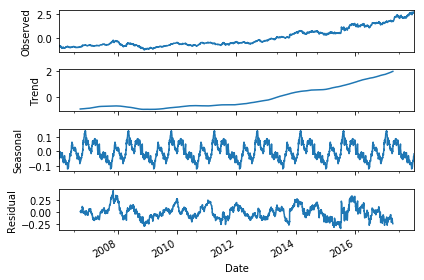

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
result = seasonal_decompose(df3.Value, model='additive', freq=365)
result.plot()
plt.show()

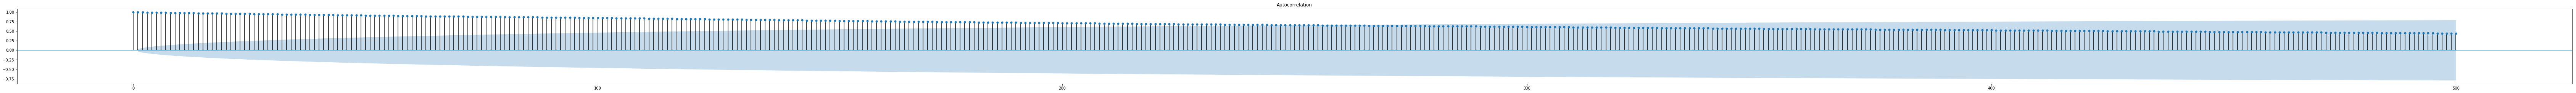

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(120,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df3.Value, lags=500, ax=ax1)

### Naive Test: Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.values)
reg.score(train_x.values, train_y.values)

reg.coef_

array([[ 0.00759117,  0.00370932, -0.01418147,  0.00284121,  0.00820135,
         0.99289239]])

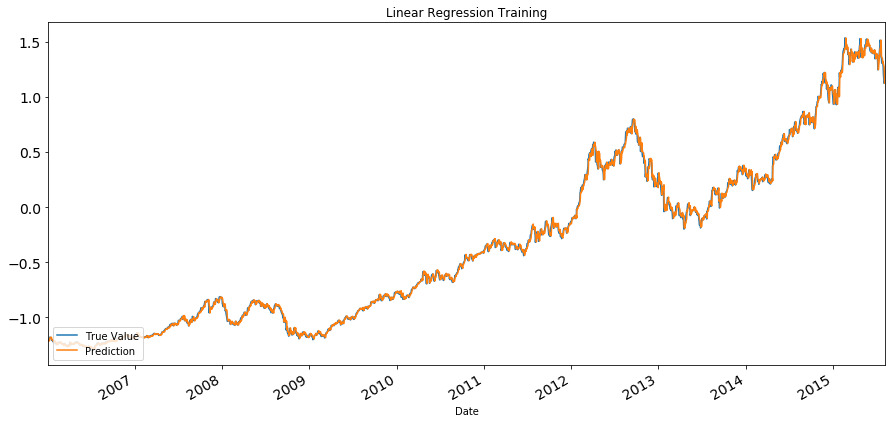

adj train r^2 = 0.9983423887416967
train mse = 0.0009905452353295714


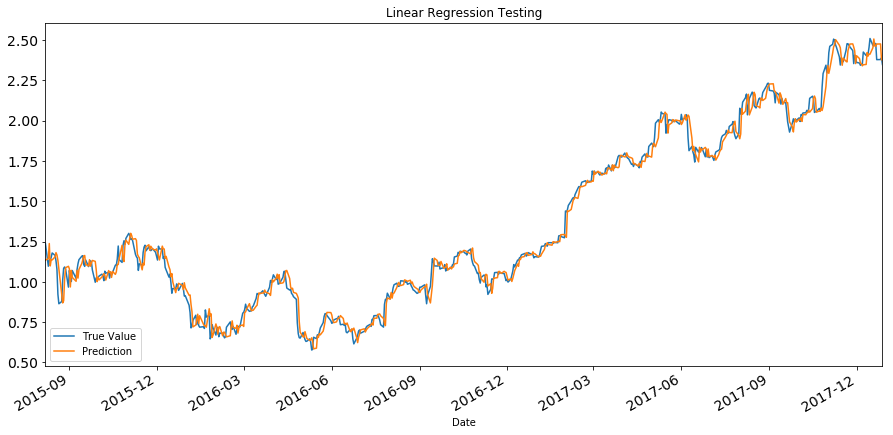

['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']
adj test r^2 = 0.9896695238812419
test mse = 0.0030238649263454307


In [73]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Naive Test: SARIMAX

In [74]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
auto_arima(df3['Value'],seasonal=True,m=7).summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 3017
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 7)   Log Likelihood                6714.583
Date:                           Thu, 16 May 2019   AIC                         -13413.166
Time:                                   21:43:46   BIC                         -13365.072
Sample:                                        0   HQIC                        -13395.871
                                          - 3017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.001      2.086      0.037    9.68e-05       0.003
ar.L1          0.2999      0.137      2.194      0.028       0.032       0.568
ar.L2         -0.6647      0.155     -4.277      0.000      -0.969      -0.360
ma.L1         -0.2762      0.142     -1.950      0.051      -0.554       0.001
ma.L2          0.6245      0.163      3.830      0.000       0.305       0.944
ma.S.L7        0.0380      0.014      2.625      0.009       0.010       0.066
ma.S.L14       0.0408      0.015      2.729      0.006       0.012       0.070
sigma2         0.0007   8.37e-06     81.496      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       55.02   Jarque-Bera (JB):              6664.54
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):              11.56   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
train.columns

Index(['Value', 'Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1'], dtype='object')

In [76]:
exog = train[['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']].values
model = SARIMAX(train['Value'],exog=exog,order=(2,1,2),
                seasonal_order=(0,0,2,7),
                enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
results.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             Value   No. Observations:                 2414
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 7)   Log Likelihood                5728.436
Date:                           Thu, 16 May 2019   AIC                         -11430.872
Time:                                   21:47:51   BIC                         -11355.712
Sample:                                        0   HQIC                        -11403.527
                                          - 2414                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5535      0.371      1.491      0.136      -0.174       1.281
x2             0.0068      0.008      0.884      0.376      -0.008       0.022
x3            -0.0123      0.009     -1.346      0.178      -0.030       0.006
x4            -0.0037      0.002     -1.777      0.076      -0.008       0.000
x5             0.0570      0.032      1.780      0.075      -0.006       0.120
x6            -0.0733      0.050     -1.471      0.141      -0.171       0.024
ar.L1         -0.7378      0.916     -0.806      0.420      -2.533       1.057
ar.L2          0.1753      0.842      0.208      0.835      -1.475       1.825
ma.L1          0.9698      0.895      1.084      0.278      -0.784       2.723
ma.L2         -0.1593      1.008     -0.158      0.874      -2.135       1.816
ma.S.L7        0.0107      0.014      0.745      0.456      -0.017       0.039
ma.S.L14       0.0213      0.018      1.185      0.236      -0.014       0.057
sigma2         0.0004   4.37e-05      9.064      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       67.49   Jarque-Bera (JB):              7661.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.87   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


adj test r^2 = 0.16912018009643803
test mse = 0.2432093464552366


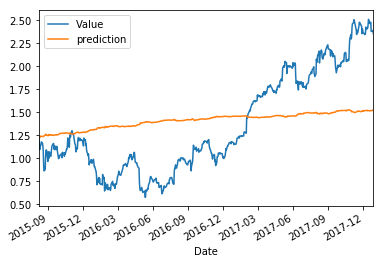

In [78]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']]
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX Predictions')

test_y2 = test_y.copy(deep=False)
test_y2['prediction']=predictions.values
test_y2.plot()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.Value, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.Value, test_y2.prediction)))

### Model 1: ExtraTrees

In [79]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=500, max_depth=3, min_samples_split=2)
reg.fit(train_x.values, train_y.values.ravel())

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=3,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

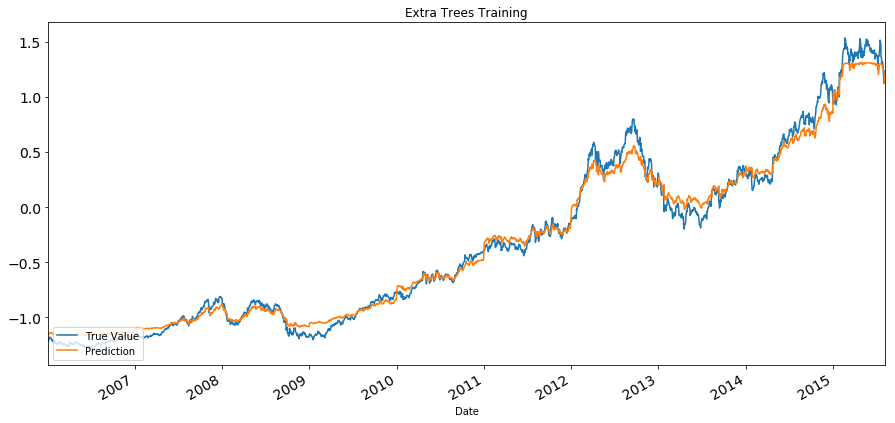

adj train r^2 = 0.988365308696567
train mse = 0.0069525879348465245


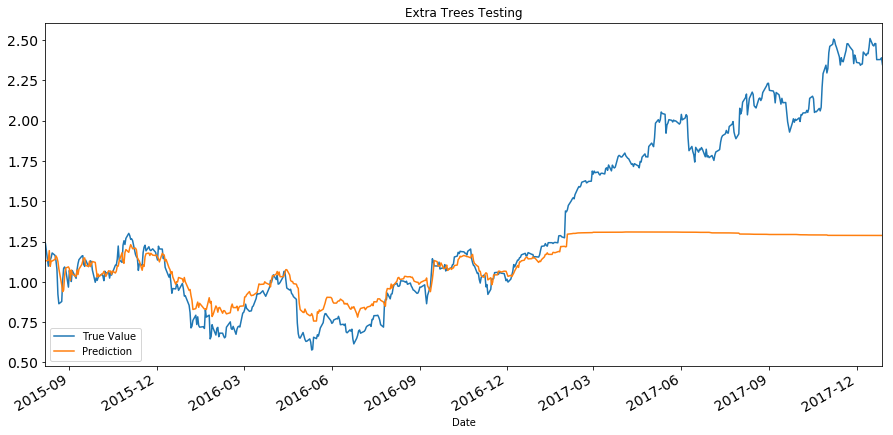

['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']
adj test r^2 = 0.26494396426374334
test mse = 0.21516047661398452


In [80]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 2: Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(train_x.values, train_y.values.ravel())

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

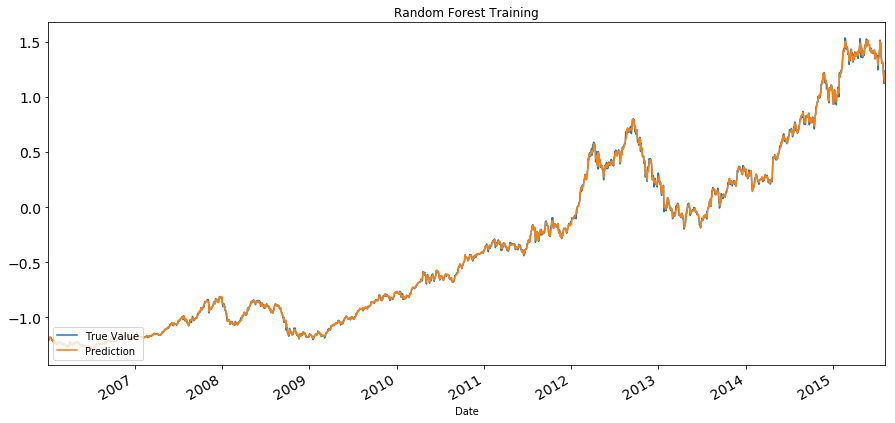

adj train r^2 = 0.9997662020228508
train mse = 0.00013971157057166394


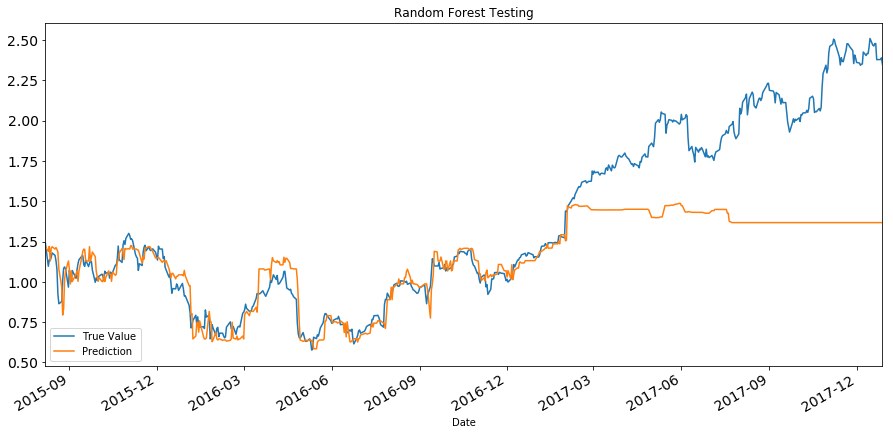

['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']
adj test r^2 = 0.42898925865950555
test mse = 0.16714228206488474


In [82]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'Random Forest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'Random Forest Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Random Forest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 3: XGBoost

In [83]:
from xgboost import XGBRegressor

reg = XGBRegressor()
reg.fit(train_x.values, train_y.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

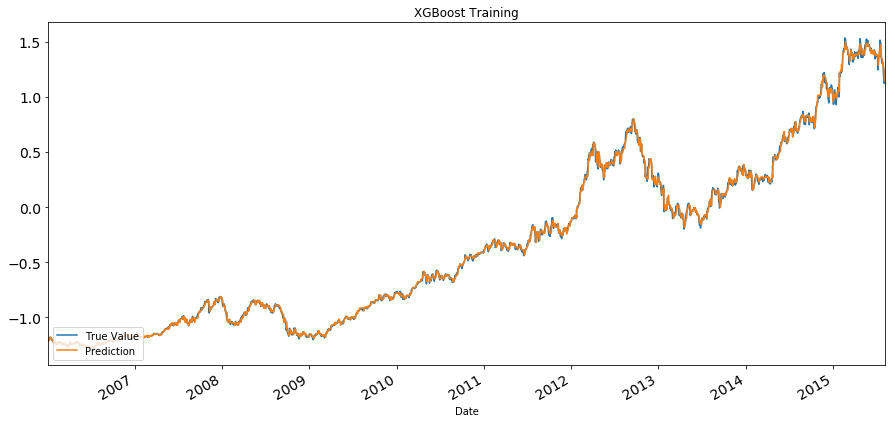

adj train r^2 = 0.9988698830207782
train mse = 0.0006753284182438099


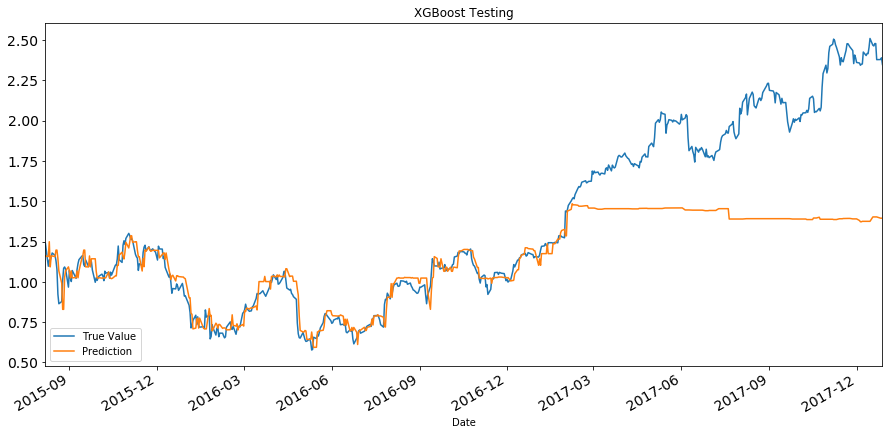

['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']
adj test r^2 = 0.4605088628606828
test mse = 0.15791608333594484


In [84]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 4: Feed Forward Neural Network

In [85]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [101]:
#K.clear_session()
model = Sequential()
model.add(Dense(64, input_dim=6, activation='tanh',kernel_regularizer=regularizers.l1(0.23)))
model.add(Dropout(0.003))
#model.add(Dense(4, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
#model.add(Dense(2, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.values.ravel(), validation_data=[test_x.values, test_y['Value'].values.ravel()], epochs=500,verbose=1,shuffle=False)

Train on 2414 samples, validate on 604 samples
Epoch 1/500
2414/2414 [==============================] - 1s 457us/step - loss: 12.3106 - val_loss: 11.0610
Epoch 2/500
2414/2414 [==============================] - 0s 76us/step - loss: 7.6311 - val_loss: 6.3791
Epoch 3/500
2414/2414 [==============================] - 0s 72us/step - loss: 4.3880 - val_loss: 3.4072
Epoch 4/500
2414/2414 [==============================] - 0s 70us/step - loss: 2.1838 - val_loss: 1.7439
Epoch 5/500
2414/2414 [==============================] - 0s 70us/step - loss: 1.0858 - val_loss: 1.1307
Epoch 6/500
2414/2414 [==============================] - 0s 74us/step - loss: 0.6487 - val_loss: 0.9517
Epoch 7/500
2414/2414 [==============================] - 0s 68us/step - loss: 0.5322 - val_loss: 0.9323
Epoch 8/500
2414/2414 [==============================] - 0s 68us/step - loss: 0.5088 - val_loss: 0.8859
Epoch 9/500
2414/2414 [==============================] - 0s 69us/step - loss: 0.4843 - val_loss: 0.8069
Epoch 10/500
2

2414/2414 [==============================] - 0s 74us/step - loss: 0.0933 - val_loss: 0.1168
Epoch 79/500
2414/2414 [==============================] - 0s 66us/step - loss: 0.0929 - val_loss: 0.1144
Epoch 80/500
2414/2414 [==============================] - 0s 64us/step - loss: 0.0919 - val_loss: 0.1142
Epoch 81/500
2414/2414 [==============================] - 0s 66us/step - loss: 0.0919 - val_loss: 0.1116
Epoch 82/500
2414/2414 [==============================] - 0s 66us/step - loss: 0.0910 - val_loss: 0.1128
Epoch 83/500
2414/2414 [==============================] - 0s 66us/step - loss: 0.0887 - val_loss: 0.1105
Epoch 84/500
2414/2414 [==============================] - 0s 67us/step - loss: 0.0917 - val_loss: 0.1103
Epoch 85/500
2414/2414 [==============================] - 0s 72us/step - loss: 0.0904 - val_loss: 0.1093
Epoch 86/500
2414/2414 [==============================] - 0s 70us/step - loss: 0.0877 - val_loss: 0.1061
Epoch 87/500
2414/2414 [==============================] - 0s 69us/st

2414/2414 [==============================] - 0s 67us/step - loss: 0.0619 - val_loss: 0.0639
Epoch 156/500
2414/2414 [==============================] - 0s 67us/step - loss: 0.0607 - val_loss: 0.0655
Epoch 157/500
2414/2414 [==============================] - 0s 67us/step - loss: 0.0618 - val_loss: 0.0649
Epoch 158/500
2414/2414 [==============================] - 0s 65us/step - loss: 0.0601 - val_loss: 0.0639
Epoch 159/500
2414/2414 [==============================] - 0s 69us/step - loss: 0.0587 - val_loss: 0.0643
Epoch 160/500
2414/2414 [==============================] - 0s 69us/step - loss: 0.0590 - val_loss: 0.0616
Epoch 161/500
2414/2414 [==============================] - 0s 67us/step - loss: 0.0577 - val_loss: 0.0636
Epoch 162/500
2414/2414 [==============================] - 0s 69us/step - loss: 0.0589 - val_loss: 0.0633
Epoch 163/500
2414/2414 [==============================] - 0s 68us/step - loss: 0.0581 - val_loss: 0.0617
Epoch 164/500
2414/2414 [==============================] - 0

2414/2414 [==============================] - 0s 68us/step - loss: 0.0477 - val_loss: 0.0470
Epoch 233/500
2414/2414 [==============================] - 0s 68us/step - loss: 0.0476 - val_loss: 0.0482
Epoch 234/500
2414/2414 [==============================] - 0s 69us/step - loss: 0.0498 - val_loss: 0.0470
Epoch 235/500
2414/2414 [==============================] - 0s 67us/step - loss: 0.0471 - val_loss: 0.0479
Epoch 236/500
2414/2414 [==============================] - 0s 67us/step - loss: 0.0488 - val_loss: 0.0468
Epoch 237/500
2414/2414 [==============================] - 0s 64us/step - loss: 0.0471 - val_loss: 0.0465
Epoch 238/500
2414/2414 [==============================] - 0s 64us/step - loss: 0.0482 - val_loss: 0.0475
Epoch 239/500
2414/2414 [==============================] - 0s 65us/step - loss: 0.0476 - val_loss: 0.0461
Epoch 240/500
2414/2414 [==============================] - 0s 65us/step - loss: 0.0469 - val_loss: 0.0469
Epoch 241/500
2414/2414 [==============================] - 0

2414/2414 [==============================] - 0s 68us/step - loss: 0.0407 - val_loss: 0.0415
Epoch 310/500
2414/2414 [==============================] - 0s 67us/step - loss: 0.0428 - val_loss: 0.0411
Epoch 311/500
2414/2414 [==============================] - 0s 67us/step - loss: 0.0404 - val_loss: 0.0410
Epoch 312/500
2414/2414 [==============================] - 0s 68us/step - loss: 0.0446 - val_loss: 0.0410
Epoch 313/500
2414/2414 [==============================] - 0s 68us/step - loss: 0.0393 - val_loss: 0.0412
Epoch 314/500
2414/2414 [==============================] - 0s 73us/step - loss: 0.0441 - val_loss: 0.0411
Epoch 315/500
2414/2414 [==============================] - 0s 66us/step - loss: 0.0373 - val_loss: 0.0409
Epoch 316/500
2414/2414 [==============================] - 0s 66us/step - loss: 0.0426 - val_loss: 0.0409
Epoch 317/500
2414/2414 [==============================] - 0s 69us/step - loss: 0.0395 - val_loss: 0.0402
Epoch 318/500
2414/2414 [==============================] - 0

2414/2414 [==============================] - 0s 68us/step - loss: 0.0391 - val_loss: 0.0368
Epoch 387/500
2414/2414 [==============================] - 0s 69us/step - loss: 0.0376 - val_loss: 0.0382
Epoch 388/500
2414/2414 [==============================] - 0s 67us/step - loss: 0.0402 - val_loss: 0.0380
Epoch 389/500
2414/2414 [==============================] - 0s 66us/step - loss: 0.0363 - val_loss: 0.0379
Epoch 390/500
2414/2414 [==============================] - 0s 68us/step - loss: 0.0402 - val_loss: 0.0370
Epoch 391/500
2414/2414 [==============================] - 0s 67us/step - loss: 0.0358 - val_loss: 0.0367
Epoch 392/500
2414/2414 [==============================] - 0s 69us/step - loss: 0.0406 - val_loss: 0.0372
Epoch 393/500
2414/2414 [==============================] - 0s 66us/step - loss: 0.0398 - val_loss: 0.0373
Epoch 394/500
2414/2414 [==============================] - 0s 67us/step - loss: 0.0378 - val_loss: 0.0371
Epoch 395/500
2414/2414 [==============================] - 0

2414/2414 [==============================] - 0s 66us/step - loss: 0.0342 - val_loss: 0.0347
Epoch 464/500
2414/2414 [==============================] - 0s 66us/step - loss: 0.0387 - val_loss: 0.0350
Epoch 465/500
2414/2414 [==============================] - 0s 67us/step - loss: 0.0335 - val_loss: 0.0350
Epoch 466/500
2414/2414 [==============================] - 0s 66us/step - loss: 0.0327 - val_loss: 0.0357
Epoch 467/500
2414/2414 [==============================] - 0s 68us/step - loss: 0.0371 - val_loss: 0.0344
Epoch 468/500
2414/2414 [==============================] - 0s 68us/step - loss: 0.0347 - val_loss: 0.0354
Epoch 469/500
2414/2414 [==============================] - 0s 72us/step - loss: 0.0365 - val_loss: 0.0352
Epoch 470/500
2414/2414 [==============================] - 0s 69us/step - loss: 0.0333 - val_loss: 0.0354
Epoch 471/500
2414/2414 [==============================] - 0s 72us/step - loss: 0.0385 - val_loss: 0.0347
Epoch 472/500
2414/2414 [==============================] - 0

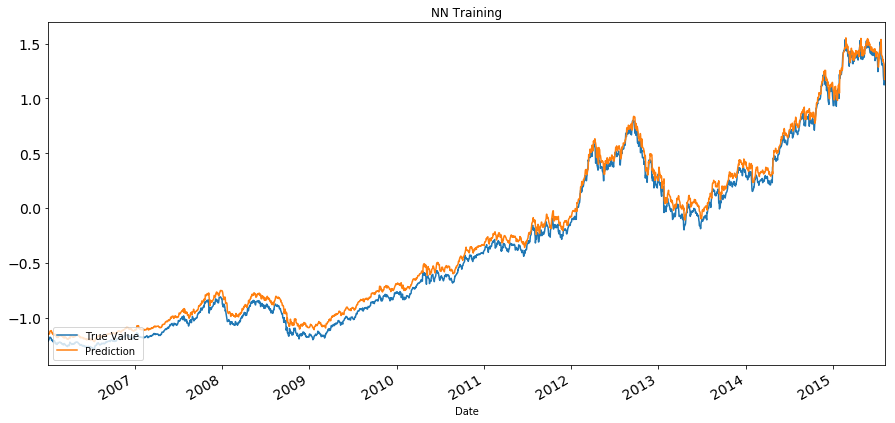

adj train r^2 = 0.990427939292531
train mse = 0.005720013711642704


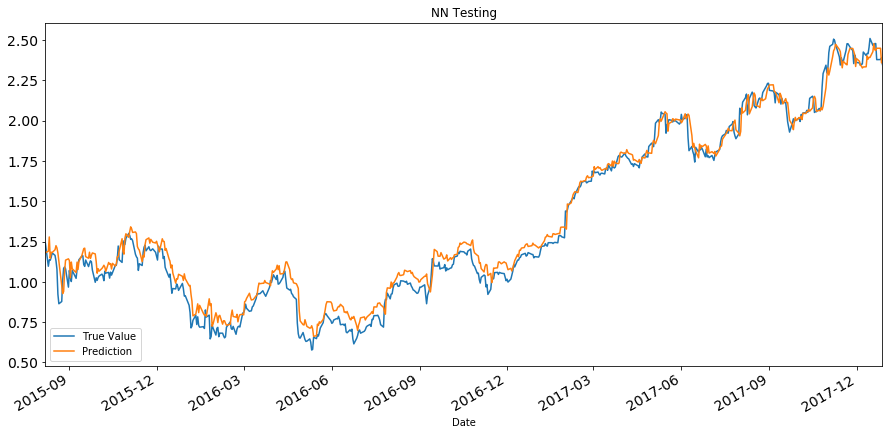

adj test r^2 = 0.9815331783484108
test mse = 0.005405479249104515


In [102]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = model.predict(train_x.values)
test_y['prediction'] = model.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, model.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, model.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 5: LSTM

In [103]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [114]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(30, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_regularizer=regularizers.l1(0.23),kernel_initializer='lecun_uniform'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=15, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.values.ravel(), validation_data=[X_tst_t, test_y['Value'].values.ravel()], epochs=500, verbose=1, shuffle=False)

Train on 2414 samples, validate on 604 samples
Epoch 1/500
2414/2414 [==============================] - 2s 669us/step - loss: 53.1170 - val_loss: 49.0620
Epoch 2/500
2414/2414 [==============================] - 0s 148us/step - loss: 41.9817 - val_loss: 38.3561
Epoch 3/500
2414/2414 [==============================] - 0s 168us/step - loss: 32.3280 - val_loss: 29.2658
Epoch 4/500
2414/2414 [==============================] - 0s 159us/step - loss: 24.0280 - val_loss: 21.5710
Epoch 5/500
2414/2414 [==============================] - 0s 155us/step - loss: 17.0608 - val_loss: 15.3191
Epoch 6/500
2414/2414 [==============================] - 0s 152us/step - loss: 11.2975 - val_loss: 10.1954
Epoch 7/500
2414/2414 [==============================] - 0s 151us/step - loss: 6.6635 - val_loss: 6.3180
Epoch 8/500
2414/2414 [==============================] - 0s 151us/step - loss: 3.3989 - val_loss: 3.8935
Epoch 9/500
2414/2414 [==============================] - 0s 154us/step - loss: 1.5141 - val_loss: 2.6

Epoch 78/500
2414/2414 [==============================] - 0s 147us/step - loss: 0.0963 - val_loss: 0.1011
Epoch 79/500
2414/2414 [==============================] - 0s 146us/step - loss: 0.0955 - val_loss: 0.0984
Epoch 80/500
2414/2414 [==============================] - 0s 146us/step - loss: 0.0949 - val_loss: 0.0992
Epoch 81/500
2414/2414 [==============================] - 0s 151us/step - loss: 0.0940 - val_loss: 0.0983
Epoch 82/500
2414/2414 [==============================] - 0s 151us/step - loss: 0.0938 - val_loss: 0.0971
Epoch 83/500
2414/2414 [==============================] - 0s 146us/step - loss: 0.0926 - val_loss: 0.0965
Epoch 84/500
2414/2414 [==============================] - 0s 147us/step - loss: 0.0926 - val_loss: 0.0958
Epoch 85/500
2414/2414 [==============================] - 0s 143us/step - loss: 0.0916 - val_loss: 0.0944
Epoch 86/500
2414/2414 [==============================] - 0s 142us/step - loss: 0.0913 - val_loss: 0.0949
Epoch 87/500
2414/2414 [======================

Epoch 155/500
2414/2414 [==============================] - 0s 146us/step - loss: 0.0661 - val_loss: 0.0656
Epoch 156/500
2414/2414 [==============================] - 0s 143us/step - loss: 0.0656 - val_loss: 0.0653
Epoch 157/500
2414/2414 [==============================] - 0s 148us/step - loss: 0.0651 - val_loss: 0.0646
Epoch 158/500
2414/2414 [==============================] - 0s 147us/step - loss: 0.0654 - val_loss: 0.0642
Epoch 159/500
2414/2414 [==============================] - 0s 143us/step - loss: 0.0645 - val_loss: 0.0639
Epoch 160/500
2414/2414 [==============================] - 0s 149us/step - loss: 0.0643 - val_loss: 0.0644
Epoch 161/500
2414/2414 [==============================] - 0s 156us/step - loss: 0.0651 - val_loss: 0.0644
Epoch 162/500
2414/2414 [==============================] - 0s 150us/step - loss: 0.0636 - val_loss: 0.0632
Epoch 163/500
2414/2414 [==============================] - 0s 148us/step - loss: 0.0640 - val_loss: 0.0644
Epoch 164/500
2414/2414 [============

2414/2414 [==============================] - 0s 154us/step - loss: 0.0538 - val_loss: 0.0537
Epoch 232/500
2414/2414 [==============================] - 0s 148us/step - loss: 0.0540 - val_loss: 0.0543
Epoch 233/500
2414/2414 [==============================] - 0s 145us/step - loss: 0.0545 - val_loss: 0.0546
Epoch 234/500
2414/2414 [==============================] - 0s 144us/step - loss: 0.0531 - val_loss: 0.0546
Epoch 235/500
2414/2414 [==============================] - 0s 148us/step - loss: 0.0540 - val_loss: 0.0534
Epoch 236/500
2414/2414 [==============================] - 0s 158us/step - loss: 0.0539 - val_loss: 0.0544
Epoch 237/500
2414/2414 [==============================] - 0s 159us/step - loss: 0.0529 - val_loss: 0.0534
Epoch 238/500
2414/2414 [==============================] - 0s 151us/step - loss: 0.0537 - val_loss: 0.0539
Epoch 239/500
2414/2414 [==============================] - 0s 152us/step - loss: 0.0537 - val_loss: 0.0543
Epoch 240/500
2414/2414 [==========================

2414/2414 [==============================] - 0s 162us/step - loss: 0.0485 - val_loss: 0.0488
Epoch 308/500
2414/2414 [==============================] - 0s 155us/step - loss: 0.0486 - val_loss: 0.0489
Epoch 309/500
2414/2414 [==============================] - 0s 157us/step - loss: 0.0486 - val_loss: 0.0496
Epoch 310/500
2414/2414 [==============================] - 0s 152us/step - loss: 0.0484 - val_loss: 0.0493
Epoch 311/500
2414/2414 [==============================] - 0s 146us/step - loss: 0.0485 - val_loss: 0.0490
Epoch 312/500
2414/2414 [==============================] - 0s 149us/step - loss: 0.0482 - val_loss: 0.0481
Epoch 313/500
2414/2414 [==============================] - 0s 156us/step - loss: 0.0483 - val_loss: 0.0488
Epoch 314/500
2414/2414 [==============================] - 0s 156us/step - loss: 0.0480 - val_loss: 0.0500
Epoch 315/500
2414/2414 [==============================] - 0s 156us/step - loss: 0.0485 - val_loss: 0.0490
Epoch 316/500
2414/2414 [==========================

2414/2414 [==============================] - 0s 158us/step - loss: 0.0438 - val_loss: 0.0472
Epoch 384/500
2414/2414 [==============================] - 0s 147us/step - loss: 0.0482 - val_loss: 0.0472
Epoch 385/500
2414/2414 [==============================] - 0s 151us/step - loss: 0.0461 - val_loss: 0.0455
Epoch 386/500
2414/2414 [==============================] - 0s 155us/step - loss: 0.0452 - val_loss: 0.0469
Epoch 387/500
2414/2414 [==============================] - 0s 151us/step - loss: 0.0449 - val_loss: 0.0468
Epoch 388/500
2414/2414 [==============================] - 0s 148us/step - loss: 0.0452 - val_loss: 0.0468
Epoch 389/500
2414/2414 [==============================] - 0s 156us/step - loss: 0.0449 - val_loss: 0.0465
Epoch 390/500
2414/2414 [==============================] - 0s 150us/step - loss: 0.0451 - val_loss: 0.0467
Epoch 391/500
2414/2414 [==============================] - 0s 148us/step - loss: 0.0452 - val_loss: 0.0467
Epoch 392/500
2414/2414 [==========================

2414/2414 [==============================] - 0s 154us/step - loss: 0.0476 - val_loss: 0.0453
Epoch 460/500
2414/2414 [==============================] - 0s 151us/step - loss: 0.0453 - val_loss: 0.0446
Epoch 461/500
2414/2414 [==============================] - 0s 151us/step - loss: 0.0422 - val_loss: 0.0451
Epoch 462/500
2414/2414 [==============================] - 0s 154us/step - loss: 0.0437 - val_loss: 0.0440
Epoch 463/500
2414/2414 [==============================] - 0s 152us/step - loss: 0.0413 - val_loss: 0.0451
Epoch 464/500
2414/2414 [==============================] - 0s 150us/step - loss: 0.0441 - val_loss: 0.0463
Epoch 465/500
2414/2414 [==============================] - 0s 152us/step - loss: 0.0410 - val_loss: 0.0449
Epoch 466/500
2414/2414 [==============================] - 0s 151us/step - loss: 0.0456 - val_loss: 0.0450
Epoch 467/500
2414/2414 [==============================] - 0s 151us/step - loss: 0.0434 - val_loss: 0.0442
Epoch 468/500
2414/2414 [==========================

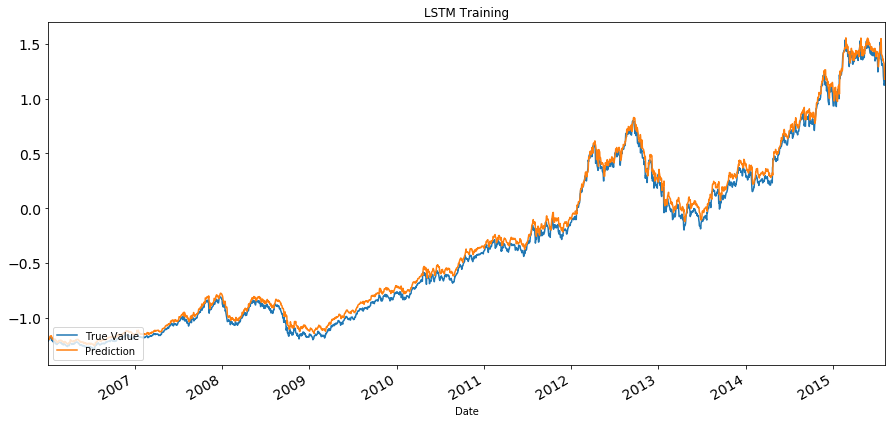

adj train r^2 = 0.9942374072528997
train mse = 0.003443575060311413


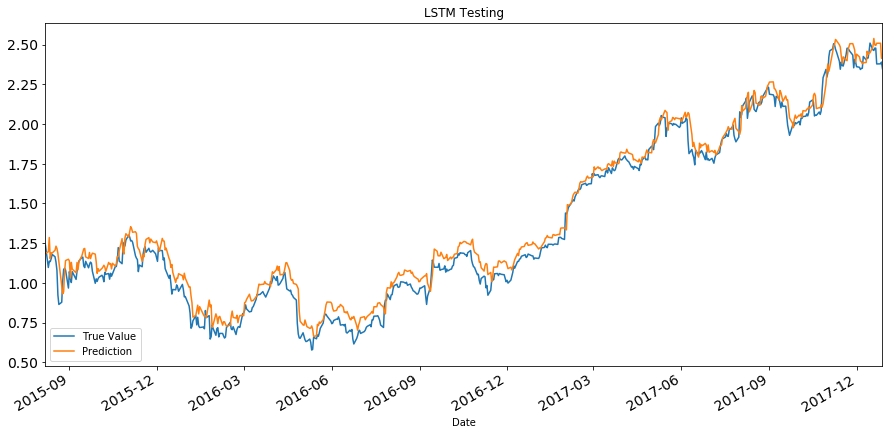

adj test r^2 = 0.9785683490050039
test mse = 0.006273323418246811


In [115]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = model_lstm.predict(X_tr_t)
test_y['prediction'] = model_lstm.predict(X_tst_t)
train_y2['Value'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, model_lstm.predict(X_tr_t))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, model_lstm.predict(X_tr_t))))
test_y['Value'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 6: TPOT

In [116]:
def my_custom_accuracy(y_true, y_pred):
    
    return (adj_r2_score((r2_score(y_true, y_pred)),train_x.shape[0], train_x.shape[1]))

In [117]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=10, max_time_mins=5, verbosity=2, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.values.ravel())

Generation 1 - Current best internal CV score: -0.0010074379493171793
Generation 2 - Current best internal CV score: -0.0010074379493171793
Generation 3 - Current best internal CV score: -0.0010074379493171793
Generation 4 - Current best internal CV score: -0.0010056230318716386
Generation 5 - Current best internal CV score: -0.0010056230318716386
Generation 6 - Current best internal CV score: -0.0010056230318716386
Generation 7 - Current best internal CV score: -0.0010056230318716386
Generation 8 - Current best internal CV score: -0.0010056230318716386
Generation 9 - Current best internal CV score: -0.0010056230318716386
Generation 10 - Current best internal CV score: -0.0010049872378362294
Generation 11 - Current best internal CV score: -0.0010049872378362294
Generation 12 - Current best internal CV score: -0.0010049872378362294
Generation 13 - Current best internal CV score: -0.0010049872378362294
Generation 14 - Current best internal CV score: -0.0010049872378362294
Generation 15 -

TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=5, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0, use_dask=False,
       verbosity=2, warm_start=False)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


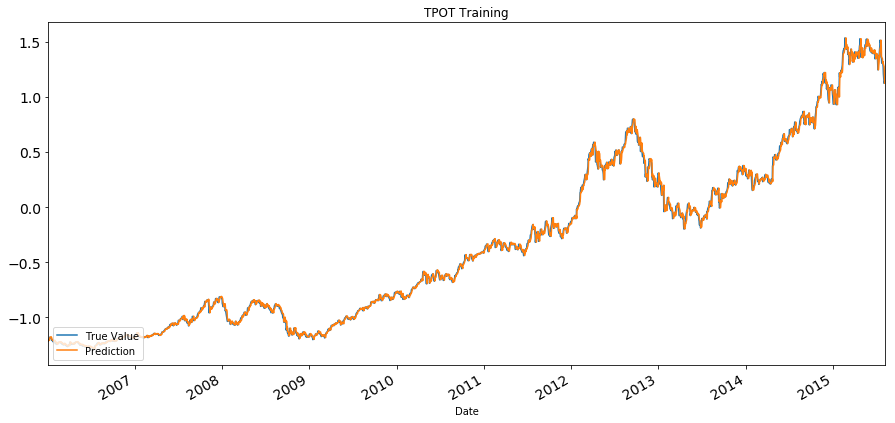

adj train r^2 = 0.9983317645254084
train mse = 0.0009968939897620154


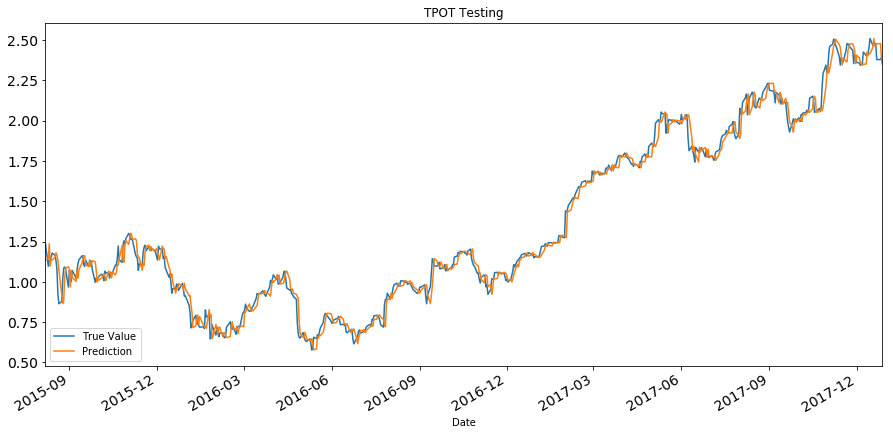

adj test r^2 = 0.9896219520872885
test mse = 0.0030377898101131375


In [118]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = tpot.predict(train_x.values)
test_y['prediction'] = tpot.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, train_y2.prediction)))
test_y['Value'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))